## Práctica en aula: Grafos de De bruijn

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

from de_bruijn_algorithm.create.create_graph import CreateGraph
from de_bruijn_algorithm.build.build_graph import BuildGraph

### 1. Definición de los k-mers

In [9]:
kmers = ["AGTT", "GTTG", "TTGA", "TGAC", "GACG", "ACGA", "CGAA", "GAAC", "AACG"]
kmers = ["ACG", "CGT", "GTG", "TGA", "GAC"]
#kmers = ["GAC", "ACG", "CGT", "CTT", "TTA", "TAC", "ACT", "CTA", "TAT", "ATG", "TGT", "GTG"]

## 2. Creación de los prefijos y sufijos y construcción del grafo

In [10]:
graph = CreateGraph().create_graph(kmers)

## 3. Conversión del grafo a un objeto de NetworkX

In [11]:
graph_builder = BuildGraph().initialize_builder('NetworkxGraph')

graph_builder.build_graph(graph)

## 4. Visualización del grafo

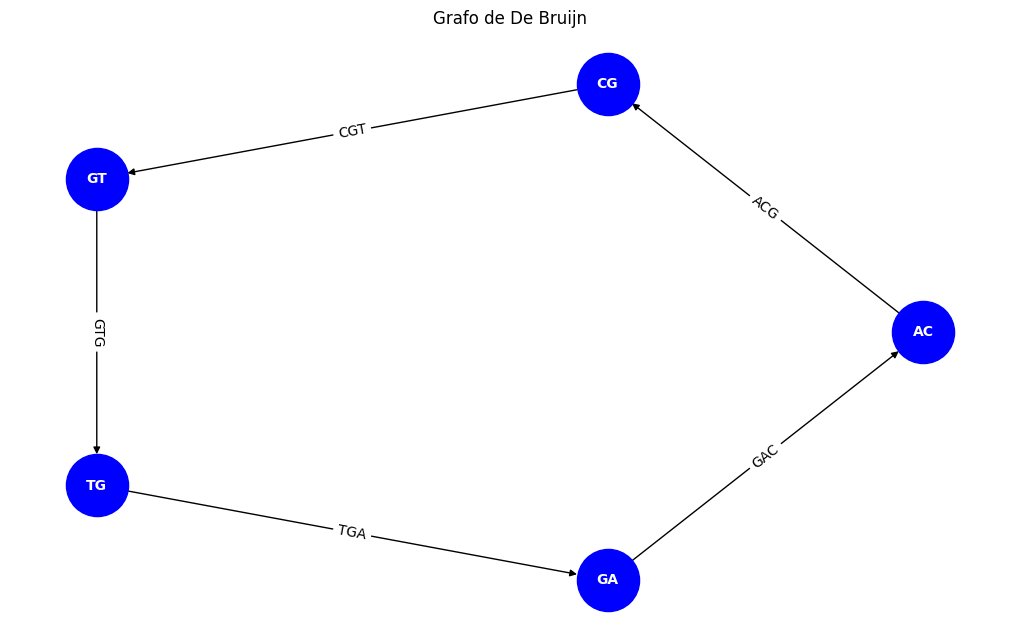

In [12]:
graph_builder.draw_graph()

## 5. Construcción del camino Euleriano

In [13]:
eulerian_path = graph_builder.get_eulerian_path()
cycle_conditions, path_conditions = graph_builder.get_conditions()
print(eulerian_path)
print(cycle_conditions)
print(path_conditions)

AC -> CG -> GT -> TG -> GA -> AC
El grafo tiene un ciclo euleriano.
No tiene un camino euleriano porque: 
  El grafo tiene 2 posible(s) nodo(s) de inicio y 2 posible(s) nodo(s) de fin


## 6. Visualización del camino Euleriano

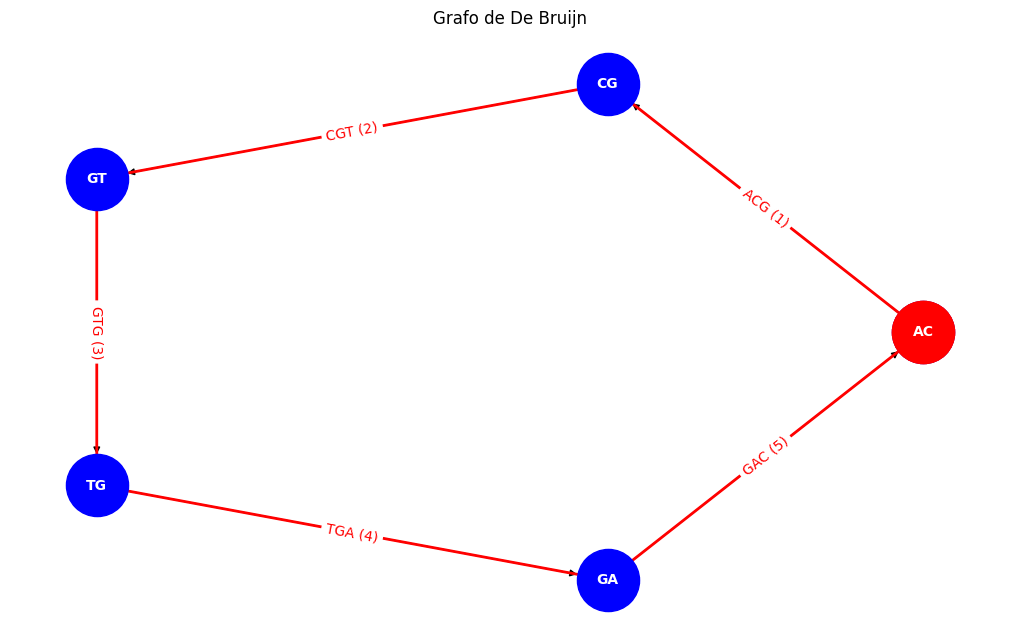

In [14]:
graph_builder.draw_graph(draw_eulerian=True)

## 7. Reconstrucción de la secuencia original

In [15]:
dna = graph_builder.assemble_sequence()
print(dna)

ACGTGAC
